# Udacity Data Analyst Nanodegree - Project 2
# Investigate a dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusion and Limitation</a></li>
<li><a href="#reference">Reference</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset

> The dataset to be used contains information about 10,000 movies collected from The Movie Database (TMDb). <br>
> The primary goal of the project is to go through the dataset and apply the general data analysis process using numpy, pandas and matplotlib.

<b>Let's have a look at the dataset provided</b>

In [93]:
import pandas as pd
tmdb_df = pd.read_csv('tmdb_movies.csv')
tmdb_df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [94]:
tmdb_df.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [95]:
tmdb_df.shape

(10866, 21)

**Total rows**  =  10866,  **Total columns**  =  21

### Question Brainstorming
> 1. How many movies are releasing on an yearly basis?
> 2. Which movie has the highest profit and highest loss? Which are the top 10 movies that have earned highest profit?
> 3. Movie with highest and lowest budget? Which are the top 10 movies having highest budget?
> 4. Movies with highest and lowest revenue? Which are the top 10 movies with highest revenues?
> 5. Which genre has the highest release of movies?
> 6. Which genres are more popular from year to year?
> 7. What is the average runtime of movies from year to year?
> 8. What is the range of runtime most liked by the audience according to popularity?
> 9. Which directors have directed most number of movies?
> 10. Who are the most frequent actors?
> 11. What are the properties associtated with highly rated and profitable movies?

<a id='wrangling'></a>
## Data Wrangling 

> Let's keep only the data which is relevant and will be useful to answer all our questions and delete the dispensable data.
### General Properties
The following two cells will print the summary of our dataset

In [96]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [97]:
tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The currency for the columns 'budget', 'revenue', 'budget_adj', 'revenue_adj' is not given. Let us assume that the currency is in *US dollars*.

### Data Cleaning

**Let's remove duplicate rows (if any)**

In [98]:
# This will remove all the duplicate rows which are present in the dataset
tmdb_df.drop_duplicates(keep ='first', inplace=True)

**Changing format of Release Date into proper datetime format**

In [99]:
#This will change the data type of 'release_date' column from string to datetime format
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])
tmdb_df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

**Removing the columns that are not needed in the analysis process**

In [100]:
#The columns such as 'budget_adj', 'revenue_adj', 'overview', 'imdb_id', 'homepage', 'tagline'
#are not necessary and let's drop these columns
columns_to_be_dropped = ['budget_adj','revenue_adj','overview','imdb_id','homepage','tagline']
tmdb_df.drop(columns_to_be_dropped, axis = 1, inplace = True)

**Dealing with null values**<br>
Let's count the total rows in each column which contain null values

In [101]:
tmdb_df.isna().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

**Drop the rows where at least one element is missing to make the data more consistent**

In [102]:
#This will drop all the rows having null values.
tmdb_df = tmdb_df.dropna()

In [103]:
tmdb_df

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966
10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,2066-01-01,11,6.5,1966
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,2066-11-02,22,5.4,1966


**Let's preview overall distribution of data from each properties**

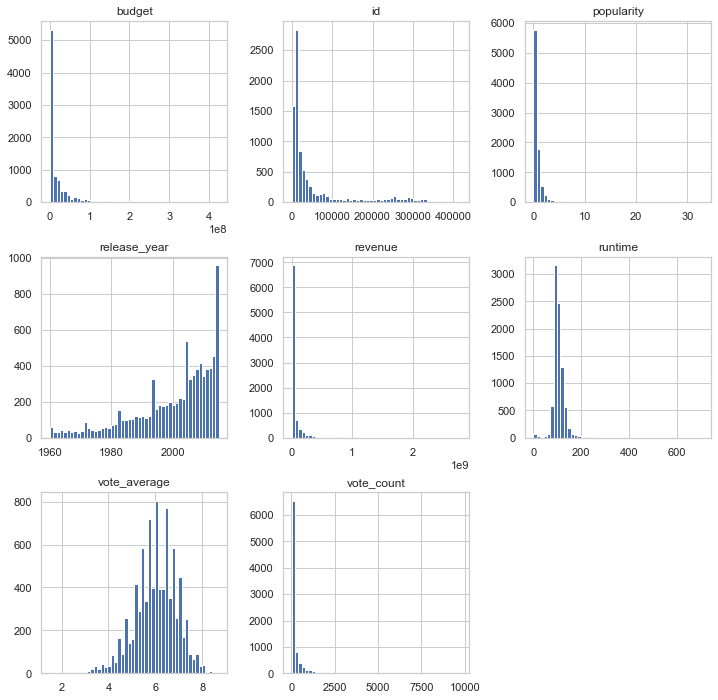

In [104]:
tmdb_df.hist(figsize = (12,12), bins=50);

As we can see from the histogram of budget and revenue, there are lot of **zero** values which makes the data inconsistent.
Let us replace all those zero values with null values to get more accurate results.

In [105]:
#let's see how many zeroes are there in both the columns
zeroes_in_budget = len(tmdb_df[tmdb_df['budget'] == 0])
zeroes_in_revenue = len(tmdb_df[tmdb_df['revenue'] == 0])
print("Number of zeroes in Budget column: {}".format(zeroes_in_budget))
print("Number of zeroes in Revenue column: {}".format(zeroes_in_revenue))

Number of zeroes in Budget column: 3940
Number of zeroes in Revenue column: 4130


In [106]:
#Replacing the zero values with null values
import numpy as np
tmdb_df['budget'] = tmdb_df['budget'].replace(0, np.NaN)
tmdb_df['revenue'] = tmdb_df['revenue'].replace(0, np.NaN)

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1: How many movies are releasing on an yearly basis?

Text(0, 0.5, 'Number Of Movies')

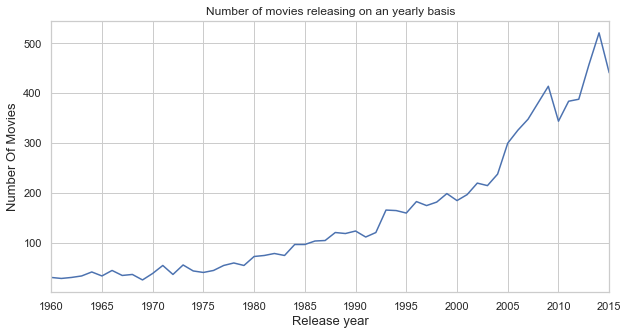

In [107]:
# Let's group by release_year and count number of movies in each year
data = tmdb_df.groupby('release_year').count()['id']
data.tail()

#Plotting the data

#Importing necessary libraries for plotting the data
import seaborn as sns
import matplotlib.pyplot as plt

data.plot(xticks = np.arange(1960,2016,5))
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Number of movies releasing on an yearly basis")
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)

From the above plot we can conclude that the entertainment industry is booming and there is exponential growth in the number of movies releasing each year.

### Question 2: Which movie has the highest profit and highest loss? Which are the top 10 movies that have earned highest profit?

In [108]:
#First we have to calculate the profit earned by each movie
#Let's add new column 'Profit' in our dataframe
tmdb_df['Profit'] = tmdb_df['revenue'] - tmdb_df['budget']

In [109]:
#Since there are 3 similar questions where we have to find minimum and maximum values, let's create 
# a function for that purpose
def find_minmax(x):
    #idxmin() function is used to find the index of the lowest value in a pandas series.
    min_index = tmdb_df[x].idxmin()
    #idxmax() function is used to find the index of the higest value in a pandas series.
    high_index = tmdb_df[x].idxmax()
    high = pd.DataFrame(tmdb_df.loc[high_index,:])
    low = pd.DataFrame(tmdb_df.loc[min_index,:])
    
    #Generalized print statements
    print("Movie which has highest " + x + " : ", tmdb_df['original_title'][high_index])
    print("Movie which has lowest " + x + " : ", tmdb_df['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

#call the find_minmax function.
find_minmax('Profit')

Movie which has highest Profit :  Avatar
Movie which has lowest Profit :  The Warrior's Way


,1386,2244
id,19995,46528
popularity,9.43277,0.25054
budget,2.37e+08,4.25e+08
revenue,2.78151e+09,1.10876e+07
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


The first column shows the details of the movie that has earned highest profit and second column shows the details of the movie that has reported highest loss in the above result. <br>
As we can see that the movie **Avatar** directed by James Cameron has earned highest profit, making over 2.5 Billion Dollars. The movie **The Warrior's Way** directed by Sngmoo Lee has made the highest loss, reporting over 400 Million Dollars. 

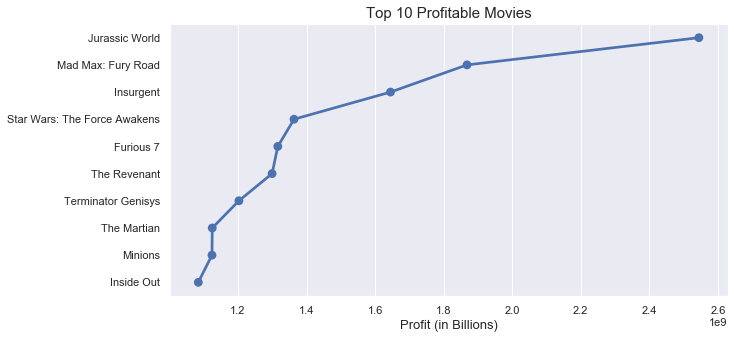

In [110]:
#plotting top 10 movies which had earned highest profit.
#Let's sort the Profit column in decending order and store it in the new dataframe
info = pd.DataFrame(tmdb_df['Profit'].sort_values(ascending = False))
info['original_title'] = tmdb_df['original_title']
data = list(map(str,(tmdb_df['original_title'])))
x = list(data[:10])
y = list(info['Profit'][:10])

#make a plot using pointplot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x)

#set the figure size
sns.set(rc={'figure.figsize':(10,5)})
#setup the title and labels of the plot.
ax.set_title("Top 10 Profitable Movies",fontsize = 15)
ax.set_xlabel("Profit (in Billions)",fontsize = 13)
sns.set_style("darkgrid")

### Question 3: Movie with highest and lowest budget? Which are the top 10 movies having highest budget?

In [111]:
#To find highest and lowest budget movies, let us use the above defined function find_minmax()
find_minmax('budget')

Movie which has highest budget :  The Warrior's Way
Movie which has lowest budget :  Fear Clinic


,2244,1151
id,46528,287524
popularity,0.25054,0.177102
budget,4.25e+08,1
revenue,1.10876e+07,NaN
original_title,The Warrior's Way,Fear Clinic
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Thomas Dekker|Robert Englund|Cleopatra Coleman...
director,Sngmoo Lee,Robert Hall
keywords,assassin|small town|revenge|deception|super speed,phobia|doctor|fear
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Horror


The first column shows the details of the movie that has highest budget and second column shows the details of the movie that has lowest budget in the above result. <br>
As we can see that the movie **The Warrior's Way** directed by Sngmoo Lee has the highest budget of 42.5 Million Dollars. The movie **Fear Clinic** directed by Robert Hall has made the lowest budget, reporting only 1 Dollar. 

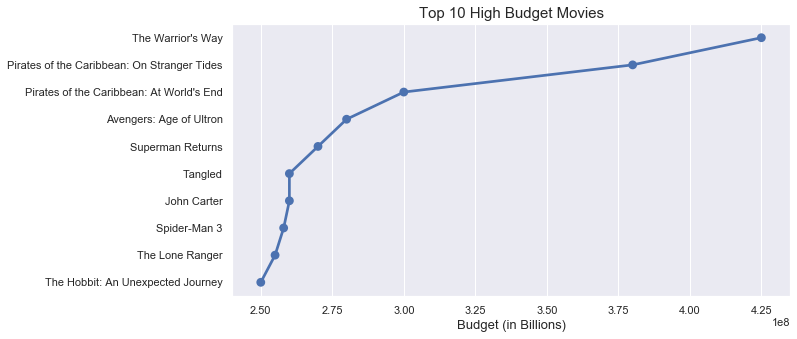

In [112]:
#plotting top 10 movies which had had the highest budget.
#Let's sort the 'budget' column in decending order and store it in the new dataframe.
info = pd.DataFrame(tmdb_df['budget'].sort_values(ascending = False))
info['original_title'] = tmdb_df['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 budget movies data from the list and dataframe.
x = list(data[:10])
y = list(info['budget'][:10])

#plot the figure and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Budget Movies",fontsize = 15)
ax.set_xlabel("Budget (in Billions)",fontsize = 13)
sns.set_style("darkgrid")

### Question 4: Movies with highest and lowest revenues? Which are the top 10 movies with highest revenues?

In [113]:
#To find movies with highest and lowest revenues, let us use the above defined function find_minmax()
find_minmax('revenue')

Movie which has highest revenue :  Avatar
Movie which has lowest revenue :  Mallrats


,1386,8142
id,19995,2293
popularity,9.43277,0.552091
budget,2.37e+08,6e+06
revenue,2.78151e+09,2
original_title,Avatar,Mallrats
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Lee|Jeremy London|Shannen Doherty|Claire...
director,James Cameron,Kevin Smith
keywords,culture clash|future|space war|space colony|so...,sex|game show|slacker|comic|shopping
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Romance|Comedy


The first column shows the details of the movie that has highest revenue and second column shows the details of the movie that has lowest revenue in the above result. <br>
As we can see that the movie **Avatar** directed by James Cameron has the garnered highest revenue of about 2781.51 Million Dollars. The movie **Shattered Glass** directed by Billy Ray has garnered lowest revenue, reporting only 2 Dollar. 

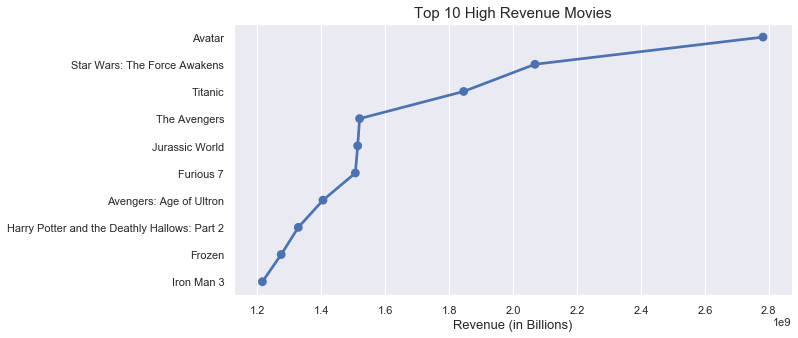

In [114]:
#plotting top 10 movies which has garnered highest revenue.
#Let's sort the 'revenue' column in decending order and store it in the new dataframe.
info = pd.DataFrame(tmdb_df['revenue'].sort_values(ascending = False))
info['original_title'] = tmdb_df['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 budget movies data from the list and dataframe.
x = list(data[:10])
y = list(info['revenue'][:10])

#plot the figure and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Revenue Movies",fontsize = 15)
ax.set_xlabel("Revenue (in Billions)",fontsize = 13)
sns.set_style("darkgrid")

### Question 5: Which genre has the highest release of movies?

In [115]:
#Let us look at the 'genre' column in our dataset 
tmdb_df['genres']

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10861                                  Documentary
10862                       Action|Adventure|Drama
10863                               Mystery|Comedy
10864                                Action|Comedy
10865                                       Horror
Name: genres, Length: 8666, dtype: object

We can see that one movie can have multiple genres. Genres are separated by '|' and let's separate each genre and count it.  

In [116]:
#Function that will split the string and return the count of each genre.
def count_genre(x):
    #concatenate all the rows of the genres.
    data_plot = tmdb_df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    genre_count = data.value_counts(ascending=False)
    return genre_count

#Let's count the movies of each genre.
total_genre_movies = count_genre('genres')


Now let's plot the data for visualization

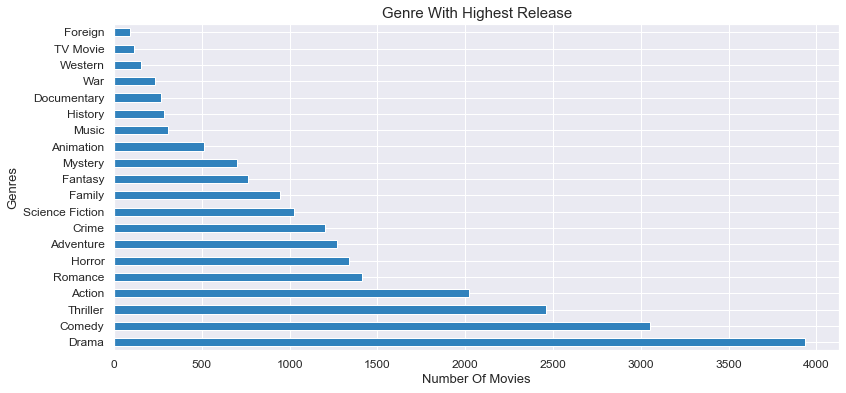

In [117]:
#plot a 'barh' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind='barh', figsize=(13,6), fontsize=12, colormap='tab20c')

#setup the title and the labels of the plot.
plt.title("Genre With Highest Release", fontsize=15)
plt.xlabel('Number Of Movies', fontsize=13)
plt.ylabel("Genres", fontsize=13)
sns.set_style("whitegrid")

We can observe that genres Drama, Comedy, Thriller and Action has the highest release of movies.

### Question 6: Which genres are more popular from year to year?

In [118]:
#map all the rows of genres in a list.
genre_details = list(map(str,(tmdb_df['genres'])))
genre = ['Adventure', 'Science Fiction', 'Fantasy', 'Crime', 'Western', 'Family','nan', 'Animation','War','Mystery','Romance','TV Movie','Action', 'Thriller','Comedy','Drama' , 'History', 'Music', 'Horror', 'Documentary', 'Foreign']

#Create Numpy arrays containing all the rows of release_year and popularity
year = np.array(tmdb_df['release_year'])
popularity = np.array(tmdb_df['popularity'])

#Create a null dataframe where genres as index and years as columns.
popularity_df = pd.DataFrame(index = genre, columns = range(1960, 2016))

#changing all the values of the dataframe from NAN to zero.
popularity_df = popularity_df.fillna(value = 0.0)

z = 0
for i in genre_details:
    split_genre = list(map(str,i.split('|')))
    popularity_df.loc[split_genre, year[z]] = popularity_df.loc[split_genre, year[z]] + popularity[z]
    z+=1

In [119]:
#calculate the standard deviation for the accurate results.
def calculate_std(x):
    return (x-x.mean())/x.std(ddof=0)

popular_genre = calculate_std(popularity_df)
popular_genre.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Adventure,0.787406,1.412525,2.141955,1.401893,0.551670,1.165511,1.010683,1.910834,1.542191,1.185769,...,0.630692,0.531893,0.715091,1.069583,1.181868,0.715645,0.846853,0.861791,1.276039,1.703254
Science Fiction,-0.447325,-0.556638,-0.636604,-0.644910,-0.666672,-0.876989,0.131481,-0.662380,1.459949,-0.681990,...,-0.284121,-0.377038,0.115034,0.772182,-0.082211,0.331251,0.226036,0.692389,0.953083,1.289502
Fantasy,-0.509629,-0.820387,-0.691328,-0.894400,-0.036621,-1.000553,-0.571201,-0.675757,-0.051966,-0.745323,...,0.075525,0.383375,-0.050630,0.161557,0.148692,0.040909,0.137821,-0.122478,-0.073655,-0.301214
Crime,-0.589720,-0.074778,-0.164532,-0.018738,0.084081,-0.519955,-0.003601,0.412203,0.213106,0.664515,...,0.127402,0.311832,0.271374,-0.382914,-0.163605,0.008252,0.123296,0.334549,-0.247828,0.034366
Western,0.739240,-0.563588,-0.242870,-0.862068,-1.008551,-0.524436,0.002440,-0.747084,-0.823969,1.081536,...,-1.027261,-1.004640,-1.072942,-1.098896,-0.941809,-0.942769,-0.847386,-0.965210,-0.928602,-0.742206


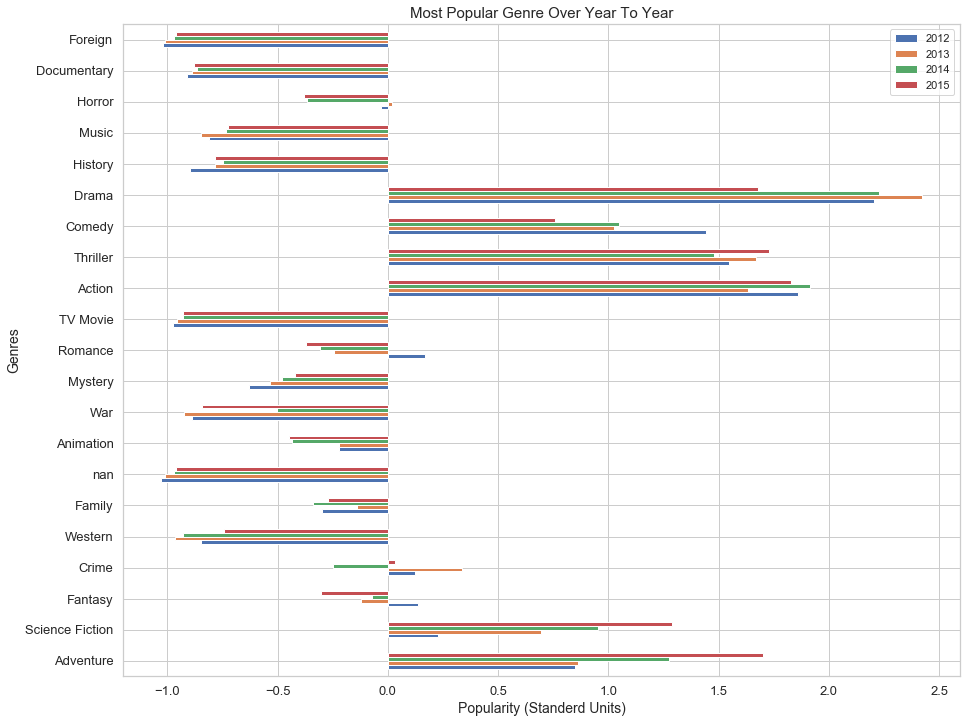

In [120]:
#plot the barh plot of the standardized data.
popular_genre.iloc[:,52:].plot(kind='barh',figsize = (15,12),fontsize=13)

#setup the title and labels of the plot.
plt.title("Most Popular Genre Over Year To Year",fontsize=15)
plt.xlabel("Popularity (Standerd Units)",fontsize=14)
plt.ylabel("Genres",fontsize = 14)
sns.set_style("whitegrid")

The popularity of a particular genre is found to be consistent over the years. **Drama, Action, Comedy, Thriller, Adventure and Science Fiction** are among the most popular ones over the last 4 years.

### Question 7: What is the average runtime of movies from year to year?

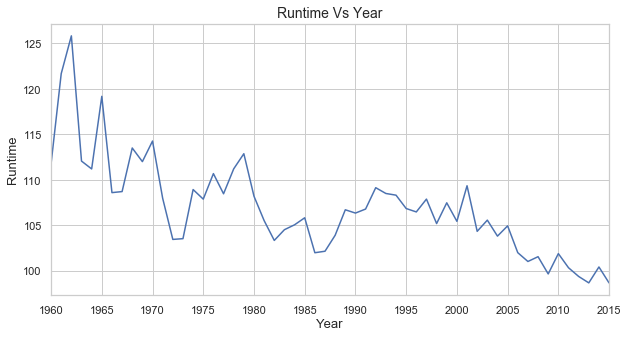

In [121]:
#Group the data by release_year and then find the mean of runtime and then plot
tmdb_df.groupby('release_year').mean()['runtime'].plot(xticks = np.arange(1960,2016,5))

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})

#setup the title of the figure
plt.title("Runtime Vs Year",fontsize = 14)

#setup the x-label and y-label of the plot.
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Runtime',fontsize = 13)
sns.set_style("whitegrid")

The average runtime of movies has decreased over the years. Since 1990, the average runtime of movies is around 110 minutes. 

### Question 8: What is the range of runtime most liked by the audience according to popularity?

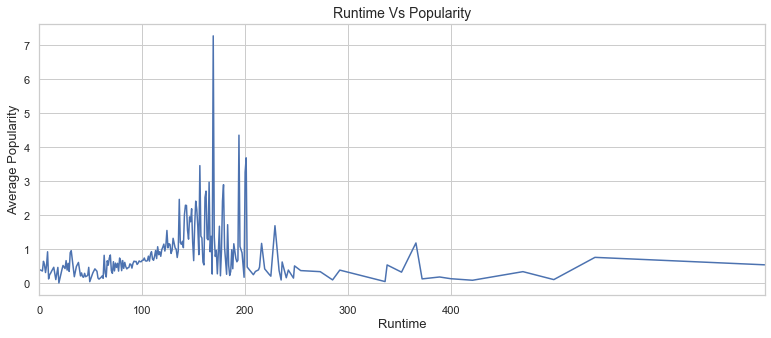

In [122]:
#Group the dataframe by runtime and find the mean of popularity and then plot the data.
tmdb_df.groupby('runtime')['popularity'].mean().plot(figsize = (13,5),xticks=np.arange(0,500,100))

#setup the title of the figure
plt.title("Runtime Vs Popularity",fontsize = 14)

#setup the x-label and y-label of the plot.
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Average Popularity',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

According to the plot, we can see that the movies of the length 130-200 minutes are more liked by the audience. 

### Question 9: Which directors have directed most number of movies?

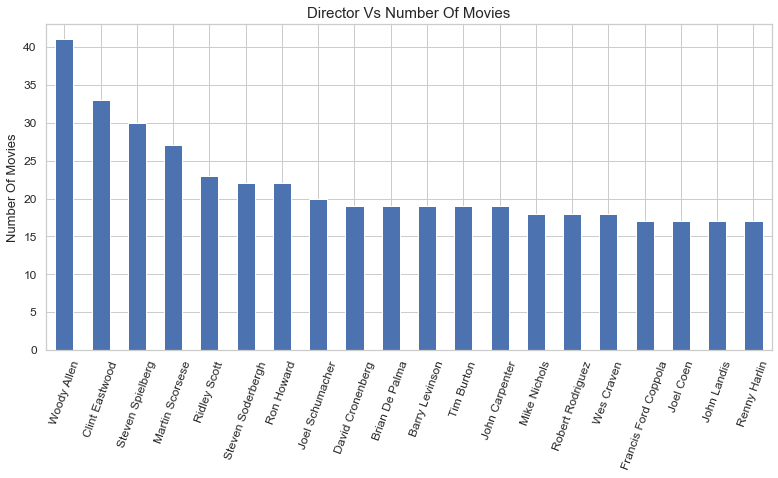

In [123]:
#Function to count number of movies directed by directors
def count_director_movies(x):
    data_plot = tmdb_df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the movies and return.
    info = data.value_counts(ascending=False)
    return info

#call the function
director_movies = count_director_movies('director')

#plot a barh graph
director_movies.iloc[:20].plot(kind='bar',figsize=(13,6),fontsize=12)

#setup the title and the labels 
plt.title("Director Vs Number Of Movies",fontsize=15)
plt.xticks(rotation=70)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")


The above plot shows the top 20 directors who have directed most number of movies. 

### Question 10: Who are the most frequent actors?

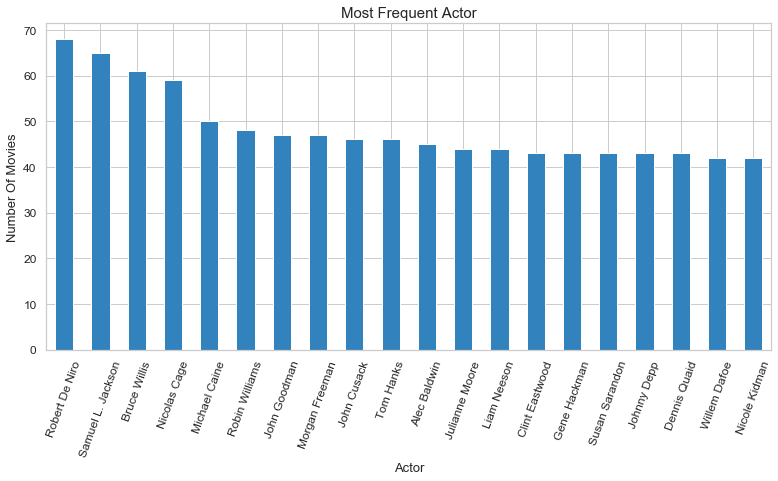

In [124]:
#Function to count number of movies done by each actor
def count_actor_movies(x):
    data_plot = tmdb_df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the movies and return.
    info = data.value_counts(ascending=False)
    return info

#calling the above function to count the number of movies done by each actor
count_actor_movies = count_actor_movies('cast')

#plot the barh plot.
count_actor_movies.iloc[:20].plot.bar(figsize=(13,6),colormap= 'tab20c',fontsize=12)

#setup the title and the labels of the plot.
plt.title("Most Frequent Actor",fontsize=15)
plt.xticks(rotation = 70)
plt.xlabel('Actor',fontsize=13)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

The above bar plot show the top 20 actors who have done most number of movies

### Question 11: What are the properties associtated with highly rated and profitable movies?

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


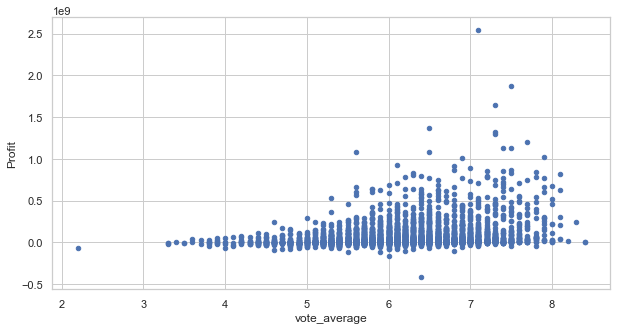

In [125]:
#Let us find the relationship between vote_average and profit earned by movies
x1 = tmdb_df.plot.scatter(x='vote_average', y='Profit');

It is clear from the above scatter plot that highly rated movies tend to earn more profits. To find the properties associated with highly rated and profitable movies, let us create a new dataframe with movies having vote average more than or equal to 6.

In [126]:
#Make a dataframe of movies with vote_average more than or equal to 7
highly_rated_movies = tmdb_df.query('vote_average >= 6')

In [127]:
highly_rated_movies.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,Profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.363529e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,2.284364e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.852382e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.868178e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.316249e+09


Since we are looking out for properties related highly rated and profitable movies, let us consider only those movies whose profit is more than or equal to 5 million dollars.

In [128]:
#Selecting movies whose profit is more than or equal to 5 million dollars
highly_rated_profitable_movies = highly_rated_movies.query('Profit >= 5000000')

In [129]:
highly_rated_profitable_movies.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,Profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.363529e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,2.284364e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.852382e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.868178e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.316249e+09


In [130]:
#Average budget for highly rated and profitable movies
avg_budget = highly_rated_profitable_movies['budget'].mean()
print("\033[1m"+"Average Budget of highly rated and profitable movies: {} Dollars".format(avg_budget))

Average Budget of highly rated and profitable movies: 43971268.855349675 Dollars


In [131]:
#Average runtime for highly rated and profitable movies
avg_runtime = highly_rated_profitable_movies['runtime'].mean()
print("\033[1m"+"Average Runtime of highly rated and profitable movies: {} Minutes".format(avg_runtime))

Average Runtime of highly rated and profitable movies: 115.08726838015541 Minutes


In [132]:
#Most frequent genres for highly rated and profitable movies

#Function that will split the string and return the count of each genre.
def count_whatever(x):
    #concatenate all the rows of the genres.
    data_plot = highly_rated_profitable_movies[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    count_anything = data.value_counts(ascending=False)
    return count_anything

#Let's count the movies of each genre.
genre_count = count_whatever('genres')

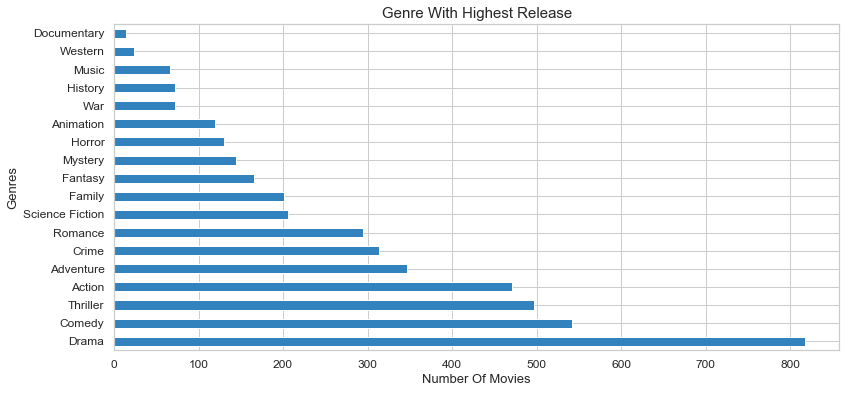

In [133]:
#plot a 'barh' plot using plot function for 'genre vs number of movies'.
genre_count.plot(kind='barh', figsize=(13,6), fontsize=12, colormap='tab20c')

#setup the title and the labels of the plot.
plt.title("Genre With Highest Release", fontsize=15)
plt.xlabel('Number Of Movies', fontsize=13)
plt.ylabel("Genres", fontsize=13)
sns.set_style("whitegrid")

From the above plot it is clear that the genres Drama, Comedy, Thriller and Action are highly rated and profitable.

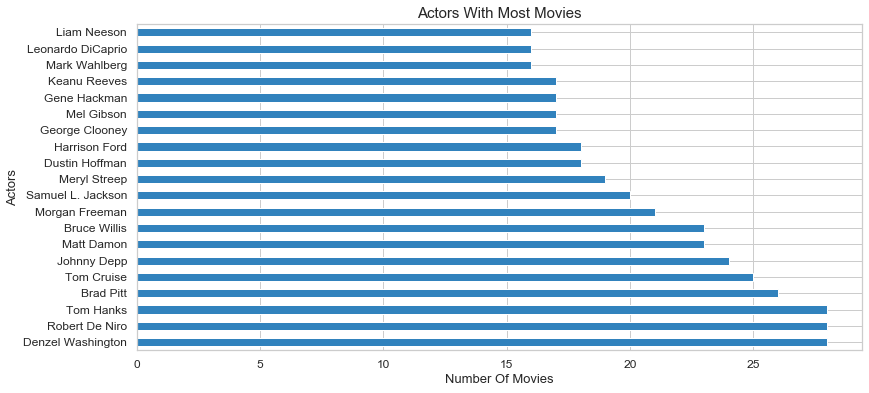

In [134]:
#Let us use the above function count_whatever() to find the most frequent actor.
actor_count = count_whatever('cast')

#plot a 'barh' plot using plot function for 'actors vs number of movies'.
actor_count.iloc[:20].plot(kind='barh', figsize=(13,6), fontsize=12, colormap='tab20c')

#setup the title and the labels of the plot.
plt.title("Actors With Most Movies", fontsize=15)
plt.xlabel('Number Of Movies', fontsize=13)
plt.ylabel("Actors", fontsize=13)
sns.set_style("whitegrid")

**The above plot shows the top 20 actors associated with highly rated and profitable movies.**

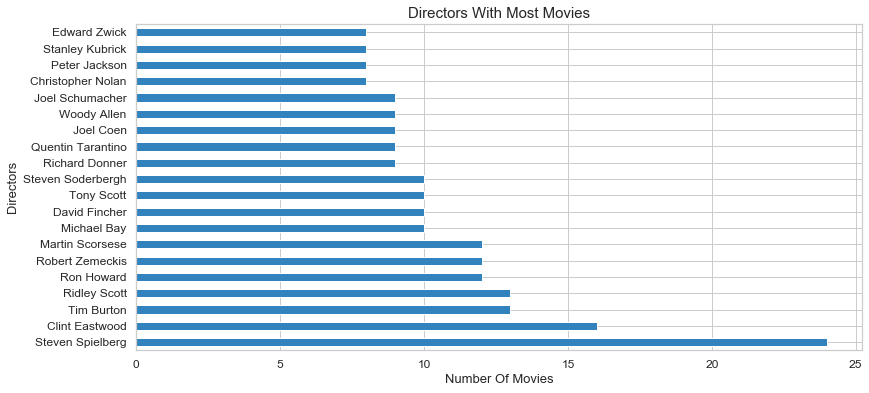

In [135]:
#Let us use the above function count_whatever() to find the most frequent director.
director_count = count_whatever('director')

#plot a 'barh' plot using plot function for 'directors vs number of movies'.
director_count.iloc[:20].plot(kind='barh', figsize=(13,6), fontsize=12, colormap='tab20c')

#setup the title and the labels of the plot.
plt.title("Directors With Most Movies", fontsize=15)
plt.xlabel('Number Of Movies', fontsize=13)
plt.ylabel("Directors", fontsize=13)
sns.set_style("whitegrid")

**The above plot shows the top 20 directors associated with highly rated and profitable movies.**

<a id='conclusions'></a>
## Conclusion

The complete data analysis process was performed on The Movie Database (TMDb). Several Python libraries such as Numpy, Pandas, Matplotlib were used extensively. 
<ul>
    <li>From the results of Question 1, we can safely conclude that the entertainment industry is booming and there is <b>exponential growth in the number of movies releasing each year.</b></li>
    <li>Movie with highest profit: <b>Avatar</b></li>
    <li>Movie with highest loss: <b>The Warrior's Way</b></li>
    <li>Movie with highest budget: <b>The Warrior's Way</b></li>
    <li>Movie with lowest budget:<b>Shattered Glass</b></li>
    <li>Movie with highest revenue:<b>Avatar</b></li>
    <li>Movie with lowest revenue: <b>Mallrats</b></li>
    <li>Most popular genres: <b>Drama, Comedy, Thriller, Action</b></li>
    <li>The popularity of a particular genre is found to be consistent over the years. Drama, Action, Comedy, Thriller, Adventure and Science Fiction are among the most popular ones over the last 4 years.</li>
    <li>The <b>average runtime of movies has decreased over the years</b>. Since 1990, the <b>average runtime of movies is around 110 minutes.</b> This is due the fact that people don't like to watch movies with longer runtime.</li>
    <li>The <b>range of movie run-length</b> most liked by people according to popularity is <b>130 to 200 minutes.</b> This is due the fact that people don't like to watch shorter length and longer length movies.</li>
    <li>Director with most movies: <b>Woody Allen</b></li>
    <li>Most frequent actor: <b>Robert de Niro</b></li>
</ul>

If the production company wants to produce a successful movie, the following formula would make the movie highly rated and profitable.
<ul>
    <li><b>Averge Budget: </b>44 million dollars</li>
    <li><b>Average Runtime: </b>115 minutes</li>
    <li><b>Genres: </b>Drama, Comedy, Thriller and Action</li>
    <li><b>Actors: </b>Denzel Washington, Robert De Niro, Tom Hanks, Brad Pitt, Tom Cruise</li>
    <li><b>Directors: </b>Steven Spielberg, Clint EastWood, Tim Burton, Ridley Scott</li>
</ul>

### Limitations
By following the above formula, we can have highly rated and profitable movie but all of the above analysis was done based on the dataset provided. We are not sure if the data provided was correct and up to date. Also, in the data cleaning process, we have removed few rows with missing data from the dataset provided to make our dataset consistent for data analysis process. This might lead to biased results. Also, the currency in the dataset is not provided and we have considered dollar currency throughtout the dataset. This might lead to biased results because not every country has same unit of currency. We don't know exactly how the vote counts are taken and how the popularity is computed. These are the factors we should take care of.

<a id='reference'></a>
## Reference

[Kaggle](https://www.kaggle.com/deepak525/investigate-tmdb-movie-dataset/)<br>
[Github](https://github.com/antra0497/Udacity--Project-Investigate-TMDB-Movies-Dataset/blob/master/investigate-a-dataset-template.ipynb)<br>
[Pandas documentation](https://pandas.pydata.org/docs/user_guide/)<br>
[Numpy documentation](https://numpy.org/doc/stable/user/)<br>
[Matplotlib documentation](https://matplotlib.org/3.2.1/tutorials/index.html)<br>